In [15]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn


In [23]:
######Now we will import the necessary packages required #######
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns



In [32]:
df = pd.read_csv('creditcard.csv')

In [12]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [13]:
#V1 to 28 are to protect the user identity such as location and name
#Class will contain 0 or 1 where 1 stands for fradulent transaction
#Now let us check the amount of data that we have
print(df.shape)

(284807, 31)


In [14]:
#We see that we have 284807 transactions with 31 columns
#now lets see the describtion of the data
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [33]:
#Because this data is so large we take a fraction of this data
df = df.sample(frac=0.2, random_state = 100)

In [18]:
#we get 20 % of data as frac 0.2 taken
print(df.shape)

(56961, 31)


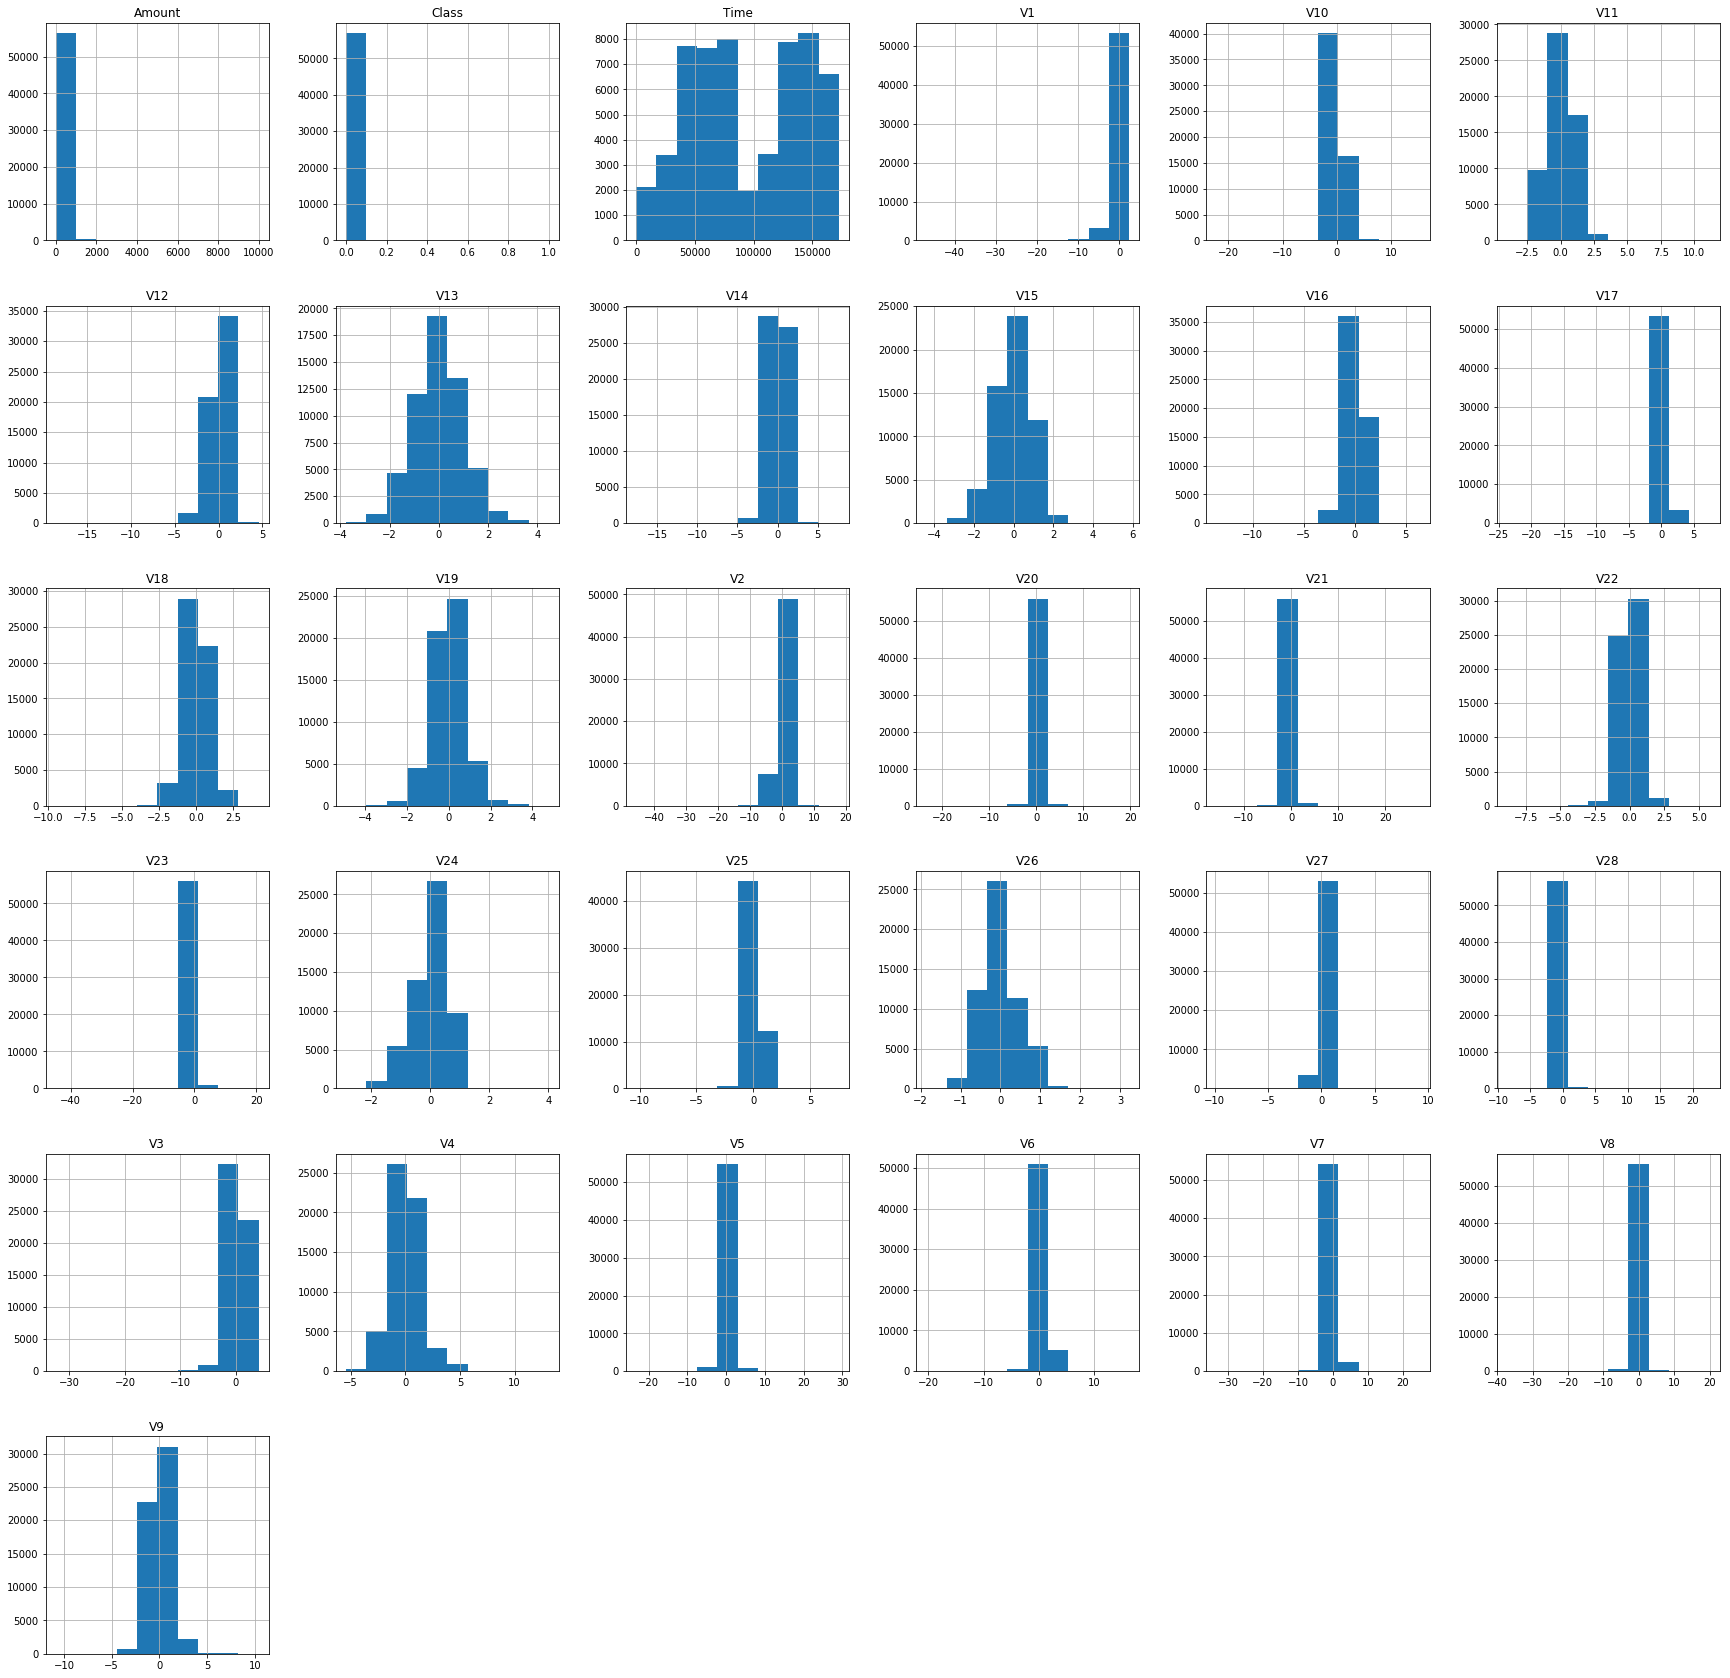

In [24]:
#Now we plot the histogram for each parameter
df.hist(figsize = (30, 30))
plot.show()

In [50]:
#In the above classes the fraud trans are with 1 and normal with 0
#Now we determine the number of fraud cases
Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]
#this gives us the number of fraud cases and valid cases
#now we print those
Ratio=len(Fraud)/float(len(Valid))
print("Number of fraud cases",Fraud.shape[0])
print("Number of valid cases",Valid.shape[0])
print("Ratio is",Fraud.shape[0]/Valid.shape[0])

Number of fraud cases 96
Number of valid cases 56865
Ratio is 0.0016882089158533368


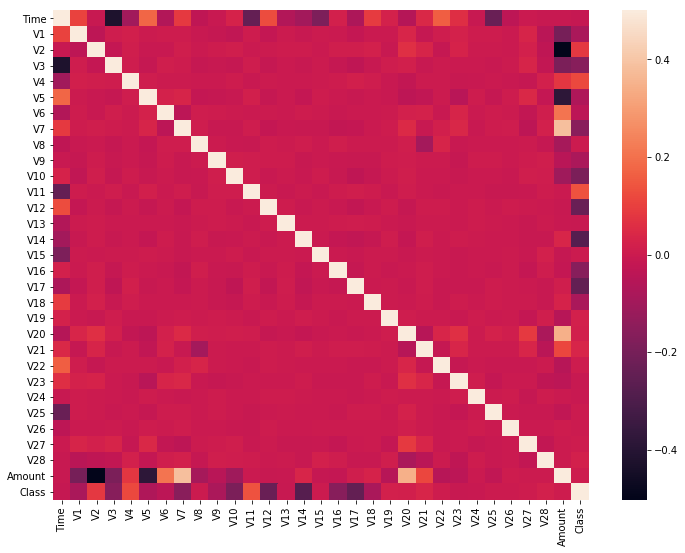

In [49]:
#we will make a corelation matrix in our dataset now This will tell us if we need or not need columns
#will tell us the important columns
corrmat = df.corr()
fig = plot.figure(figsize = (12, 9))

#now we draw the heatmap of the matrix and display the plot
sns.heatmap(corrmat,vmax=0.5)
plot.show()

In [47]:
# We get all the columns from the dataframe and store it in columns
columns = df.columns.tolist()

# Filter the columns to remove data we do not want

columns.remove('Class')
#As we will be predicting on Class we removed Class
# We now store the variable we'll be predicting on
target = "Class"

X = df[columns]
Y = df[target]

# Print the shapes of X and Y
print(X.shape)
print(Y.shape)

(56961, 30)
(56961,)


In [56]:
#As we see data size of data is huge I am not using SVM(Support Vector MAchine) as it takes a longer time.
#Thus using more commonly used Isolation Forest and Local Outlier Factor
#I have used Isolation Forest because isolating anomaly observations is easier because only a few
#conditions are needed to separate those cases from the normal observations. 
#I am using LocalOutlierFactor which finds the neighbour density and uses the concept that faults
#have lower density than their neighbors.
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define random state
state = 1
#now we will put the two methods on a dictionary
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=Ratio,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=5,
        # 20 is like a standard that is used but this value should be higher the higher the outliers in the dataset
        contamination=Ratio)}


In [57]:
#We now have to fit the model

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    #now we fit the data and tag outliners
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

C:\Users\Pranav\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\Pranav\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 147
0.9974192868804972
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.24      0.24      0.24        96

    accuracy                           1.00     56961
   macro avg       0.62      0.62      0.62     56961
weighted avg       1.00      1.00      1.00     56961

Local Outlier Factor: 185
0.9967521637611699
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.04      0.04      0.04        96

    accuracy                           1.00     56961
   macro avg       0.52      0.52      0.52     56961
weighted avg       1.00      1.00      1.00     56961

